In [1]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np

In [2]:
from ann import DeepNeuralNetwork
from util import ActivationFunction, ActivationType,Regularization,OptimizationScheme

In [3]:
data = load_breast_cancer()
X = data["data"]
y = data["target"]

scaler = StandardScaler().fit(X)
X = scaler.transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
X_train = X_train.T
X_test = X_test.T
y_train = y_train.reshape(1, -1)
y_test = y_test.reshape(1, -1)

In [4]:
nn_structure = [(X_train.shape[0], ActivationFunction(activation_type=ActivationType.leakyrelu)),
                (30, ActivationFunction(activation_type=ActivationType.leakyrelu)),
                (30, ActivationFunction(activation_type=ActivationType.leakyrelu)),
                (1, ActivationFunction(activation_type=ActivationType.sigmoid))]

Gradient Descent with adam
Iteration 0; Cost 0.6931428432048468
Iteration 500; Cost 0.6901726861748209
Iteration 1000; Cost 0.671729051255346
Iteration 1500; Cost 0.6151115239751845
Iteration 2000; Cost 0.5055444232824703
Iteration 2500; Cost 0.36233977512948984
Iteration 3000; Cost 0.23477306870049525
Iteration 3500; Cost 0.151226872266575
Iteration 4000; Cost 0.1015541846529502
Iteration 4500; Cost 0.07534198850683095
Iteration 5000; Cost 0.06010791489798879
Iteration 5500; Cost 0.05040073987694976
Iteration 6000; Cost 0.04160363916873628
Iteration 6500; Cost 0.03481731229893822
Iteration 7000; Cost 0.02913918028779086
Iteration 7500; Cost 0.024193565502579156
Iteration 8000; Cost 0.019911287351973648
Iteration 8500; Cost 0.01637033213405457
Iteration 9000; Cost 0.013457169520809878
Iteration 9500; Cost 0.009778018240225556
Iteration 10000; Cost 0.007295950144453642
Iteration 10500; Cost 0.00559913445946165
Iteration 11000; Cost 0.004273351986187147
Iteration 11500; Cost 0.0031949110

KeyboardInterrupt: 

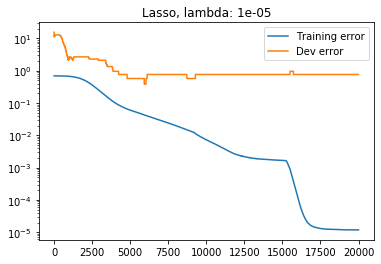

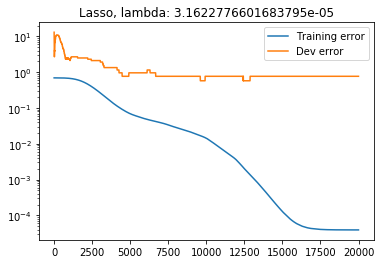

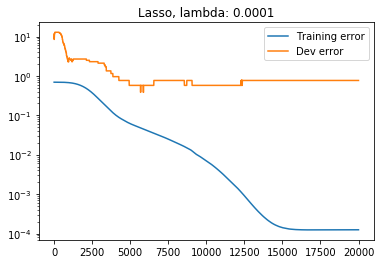

In [5]:
# Same learning rate, different optimizations
for reg in [Regularization.lasso]:
    for lambd in np.logspace(-5, -3, 5):
        thisNN = DeepNeuralNetwork(nn_structure)
        cost = thisNN.gradient_descent(X_train, y_train, learning_rate=0.00001, num_iter=20000,
                                       minibatch_size=None,
                                       optimization_scheme=OptimizationScheme.adam,
                                       regularization=reg,
                                       lambd=lambd,
                                       dev_set=[X_test, y_test])
        thisNN.plot_learning_curve(title="{0}, lambda: {1}".format(reg.value, lambd), logarithmic=True)
        ypred = thisNN.predict(X_test)
        print(classification_report(y_test.T, ypred.T))
plt.show()